In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

interessantes## Abrindo dados

In [3]:
df = pd.read_parquet(path="./../data/clean_data/eda_clusters.parquet")
df

comdate_diff   price  freight_value  \
0                11  289.00          46.48   
1               -28  259.90          22.31   
2               -17   14.99           7.78   
3                17   25.00          14.10   
4                 7   99.90          22.57   
...             ...     ...            ...   
87849            -8   55.00          20.88   
87850             3  114.90          14.16   
87851             7   37.00          19.04   
87852           -21  689.00          22.07   
87853            -6   13.99           7.78   

       commercial_dates_day_since_year_start  commercial_dates_year  \
0                                          0                   2018   
1                                        284                   2017   
2                                         66                   2018   
3                                          0                   2018   
4                                          0                   2018   
...                                      ...                    ...   
87849                                    358                   2017   
87850                                     90                   2018   
87851                                     90                   2018   
87852                                    327                   2017   
87853                                    358                   2017   

       commercial_dates_month  commercial_dates_day  \
0                           1                     1   
1                          10                    12   
2                           3                     8   
3                           1                     1   
4                           1                     1   
...                       ...                   ...   
87849                      12                    25   
87850                       4                     1   
87851                       4                     1   
87852                      11                    24   
87853                      12                    25   

       order_purchase_day_since_year_start  order_purchase_year  \
0                                       11                 2018   
1                                      256                 2017   
2                                       49                 2018   
3                                       17                 2018   
4                                        7                 2018   
...                                    ...                  ...   
87849                                  350                 2017   
87850                                   93                 2018   
87851                                   97                 2018   
87852                                  306                 2017   
87853                                  352                 2017   

       order_purchase_month  ...  mean_price_by_commercial_date  \
0                         1  ...                      92.179011   
1                         9  ...                     116.931149   
2                         2  ...                     106.874941   
3                         1  ...                     108.666584   
4                         1  ...                      82.903521   
...                     ...  ...                            ...   
87849                    12  ...                     100.261696   
87850                     4  ...                     106.242859   
87851                     4  ...                     115.585435   
87852                    11  ...                     204.739577   
87853                    12  ...                     109.808333   

       std_price_by_commercial_date  commercial_date_coded  \
0                        169.492277                      7   
1                        158.173943                      7   
2                        134.596300                      1   
3                        118.364277                      7   
4                   

In [3]:
# df_data = df.drop(columns=["filtered_category", "commercial_date", "time_window_order"])

## Estatisticas

In [4]:
df.describe().T

count         mean         std  \
comdate_diff                           87853.0    -1.034182   14.308723   
price                                  87853.0   116.408901  163.528563   
freight_value                          87853.0    19.392847   14.597126   
commercial_dates_day_since_year_start  87853.0   167.767942  100.196339   
commercial_dates_year                  87853.0  2017.535713    0.504873   
commercial_dates_month                 87853.0     6.201393    3.110795   
commercial_dates_day                   87853.0    11.574369    6.478567   
order_purchase_day_since_year_start    87853.0   168.179584   98.539076   
order_purchase_year                    87853.0  2017.531752    0.505138   
order_purchase_month                   87853.0     6.079622    3.227985   
order_purchase_day                     87853.0    15.555860    8.663930   
commercial_date_seazonal_weight        87853.0     8.331438    7.186069   
sensitivity                            87853.0     5.372857    4.865512   
mean_price_by_commercial_date          87853.0   116.484514   33.398934   
std_price_by_commercial_date           87853.0   149.751995   61.194366   
commercial_date_coded                  87853.0     4.852458    2.606904   
time_window_order_coded                87853.0     0.950167    0.667575   
filtered_category_coded                87853.0     6.545172    3.828252   
cluster                                87853.0     1.078688    0.883566   

                                               min          25%          50%  \
comdate_diff                            -33.000000   -11.000000    -1.000000   
price                                     1.200000    40.000000    74.800000   
freight_value                             0.000000    13.040000    16.200000   
commercial_dates_day_since_year_start     0.000000    90.000000   162.000000   
commercial_dates_year                  2016.000000  2017.000000  2018.000000   
commercial_dates_month                    1.000000     4.000000     6.000000   
commercial_dates_day                      1.000000     8.000000    12.000000   
order_purchase_day_since_year_start       0.000000    85.000000   162.000000   
order_purchase_year                    2016.000000  2017.000000  2018.000000   
order_purchase_month                      1.000000     3.000000     6.000000   
order_purchase_day                        1.000000     8.000000    16.000000   
commercial_date_seazonal_weight           0.000000     0.000000    10.360727   
sensitivity                               0.000000     0.000000     4.927322   
mean_price_by_commercial_date            33.432759    92.179011   112.252643   
std_price_by_commercial_date             21.338795    99.045735   157.355303   
commercial_date_coded                     0.000000     3.000000     5.000000   
time_window_order_coded                   0.000000     1.000000     1.000000   
filtered_category_coded                   0.000000     4.000000     6.000000   
cluster                                   0.000000     0.000000     1.000000   

                                               75%          max  
comdate_diff                              9.000000    32.000000  
price                                   132.700000  4059.000000  
freight_value                            20.800000   409.680000  
commercial_dates_day_since_year_start   224.000000   358.000000  
commercial_dates_year                  2018.000000  2018.000000  
commercial_dates_month                    8.000000    12.000000  
commercial_dates_day                     13.000000    25.000000  
order_purchase_day_since_year_start     233.000000   364.000000  
order_purchase_year                    2018.000000  2018.000000  
order_purchase_month                      8.000000    12.000000  
order_purchase_day                       23.000000    31.000000  
commercial_date_seazonal_weight          14.678600    18.553476  
sensitivity                               9.696911    15.619597  
mean_price_by_c

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87853 entries, 0 to 87853
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   comdate_diff                           87853 non-null  int64  
 1   price                                  87853 non-null  float64
 2   freight_value                          87853 non-null  float64
 3   commercial_dates_day_since_year_start  87853 non-null  int64  
 4   commercial_dates_year                  87853 non-null  int64  
 5   commercial_dates_month                 87853 non-null  int64  
 6   commercial_dates_day                   87853 non-null  int64  
 7   order_purchase_day_since_year_start    87853 non-null  int64  
 8   order_purchase_year                    87853 non-null  int64  
 9   order_purchase_month                   87853 non-null  int64  
 10  order_purchase_day                     87853 non-null  int64  
 11  commerc

In [8]:
colunas_categoricas=df.select_dtypes(include=['object']).columns.tolist()
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()

In [9]:
print(colunas_categoricas)
print(colunas_numericas)

['hue', 'filtered_category', 'commercial_date', 'time_window_order']
['comdate_diff', 'price', 'freight_value', 'commercial_dates_day_since_year_start', 'commercial_dates_year', 'commercial_dates_month', 'commercial_dates_day', 'order_purchase_day_since_year_start', 'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'commercial_date_seazonal_weight', 'sensitivity', 'mean_price_by_commercial_date', 'std_price_by_commercial_date', 'commercial_date_coded', 'time_window_order_coded', 'filtered_category_coded', 'cluster']


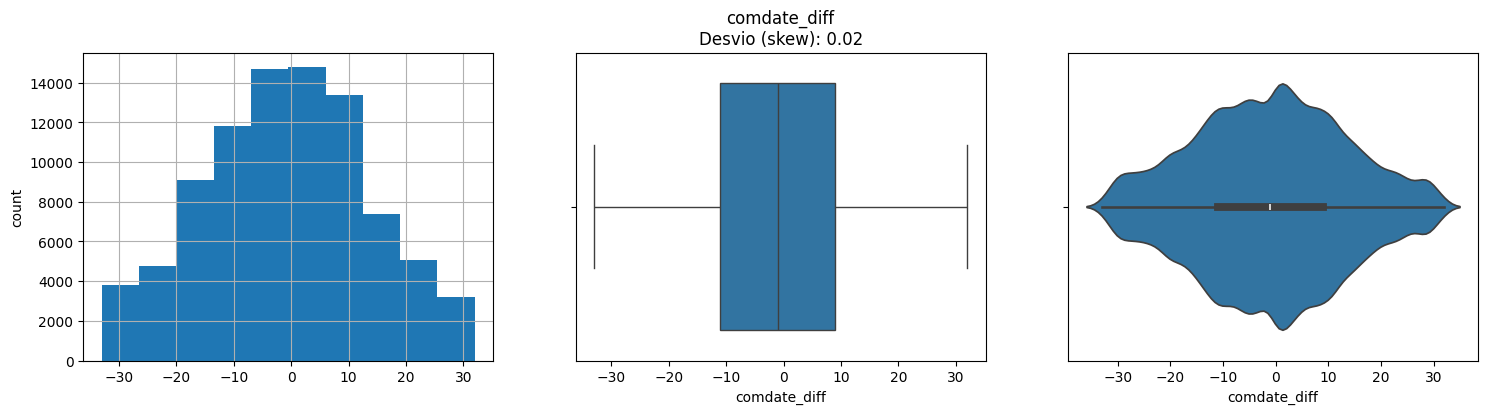

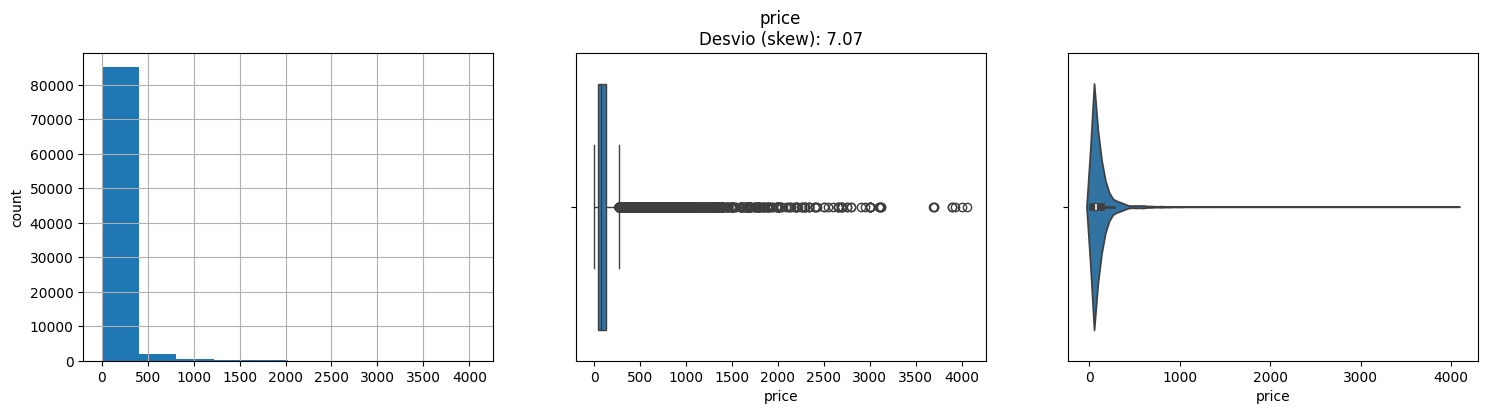

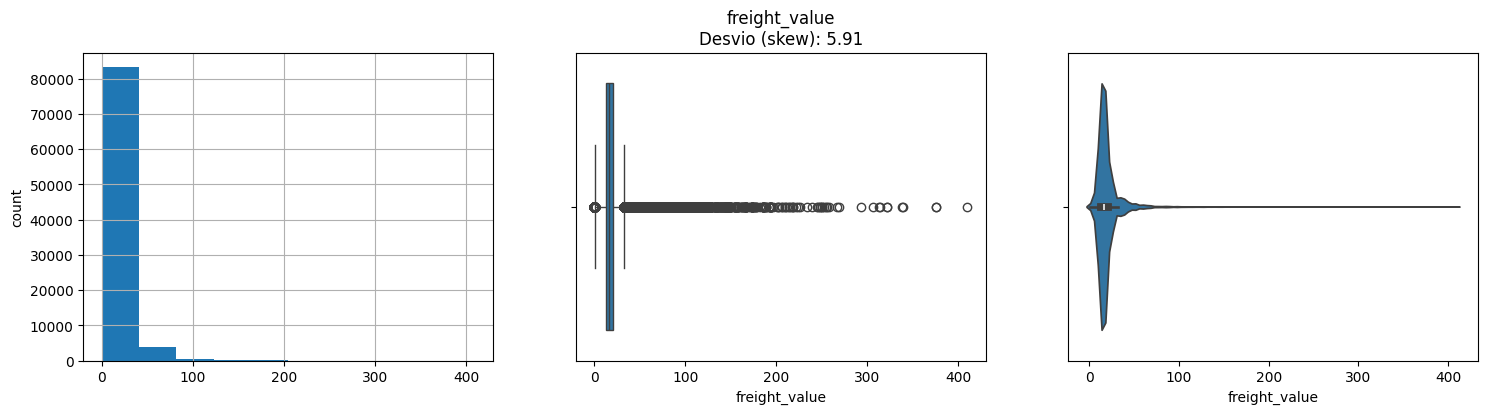

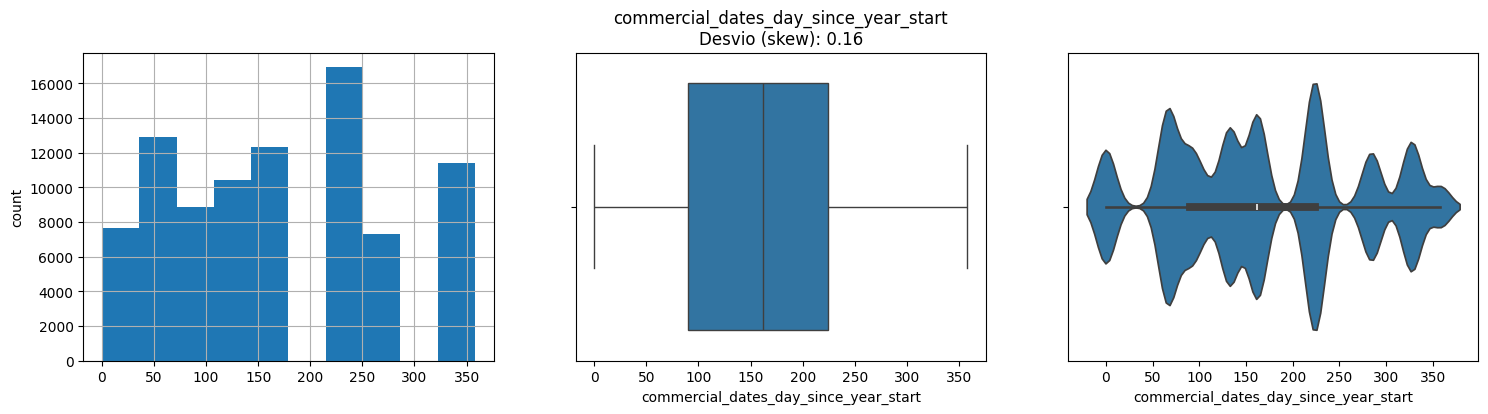

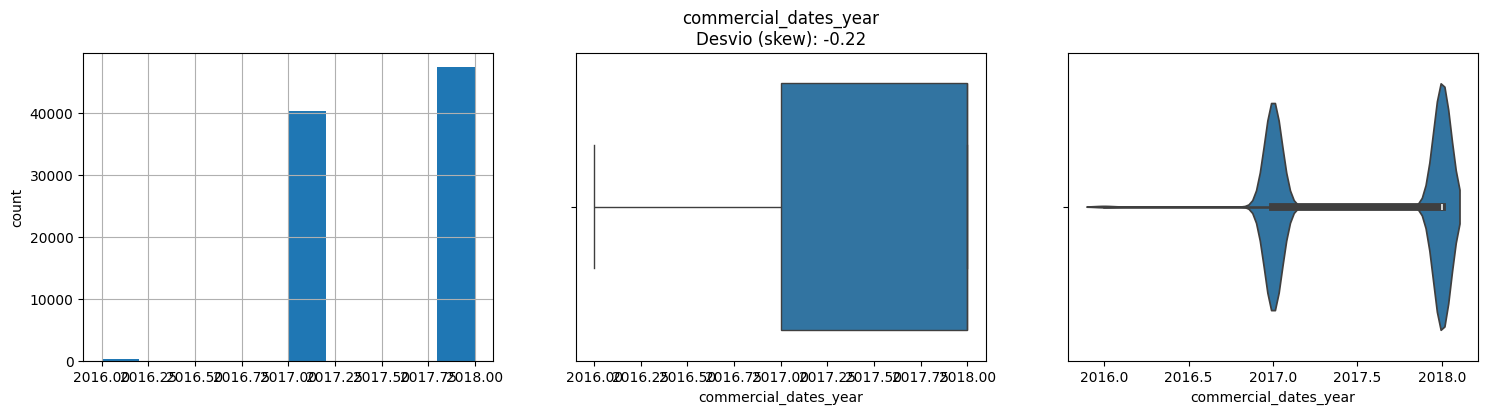

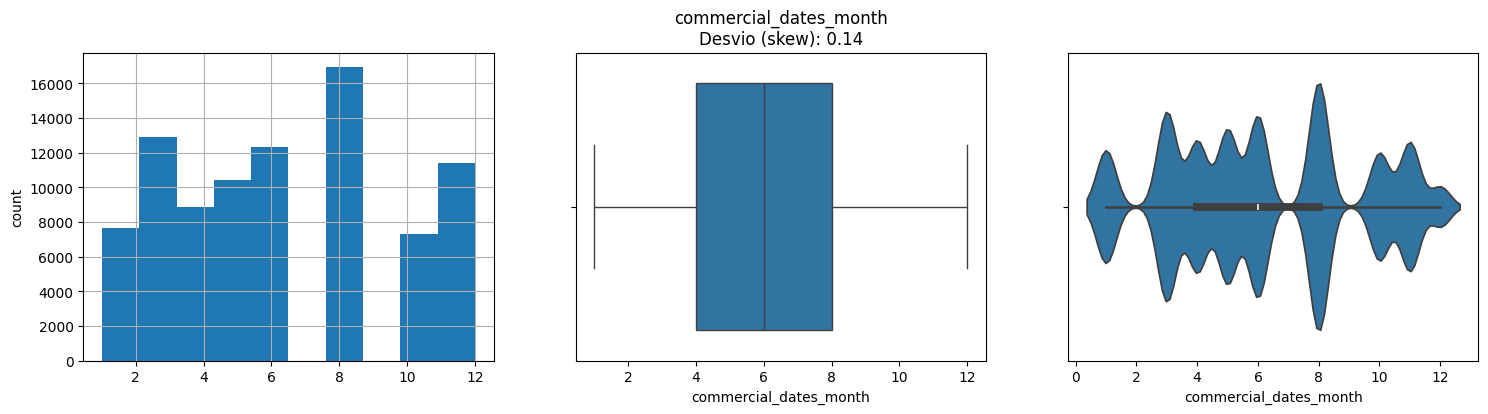

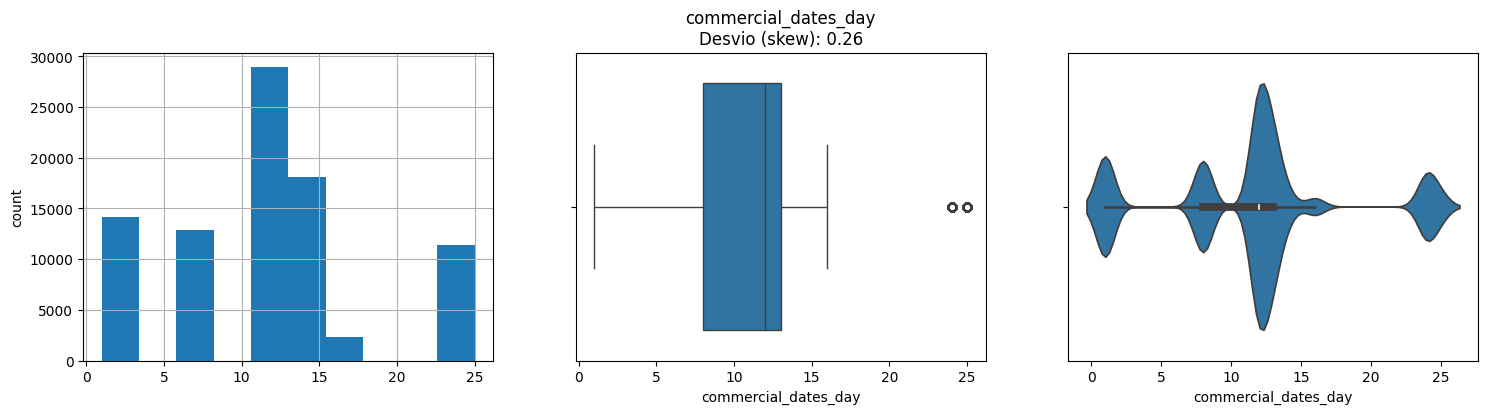

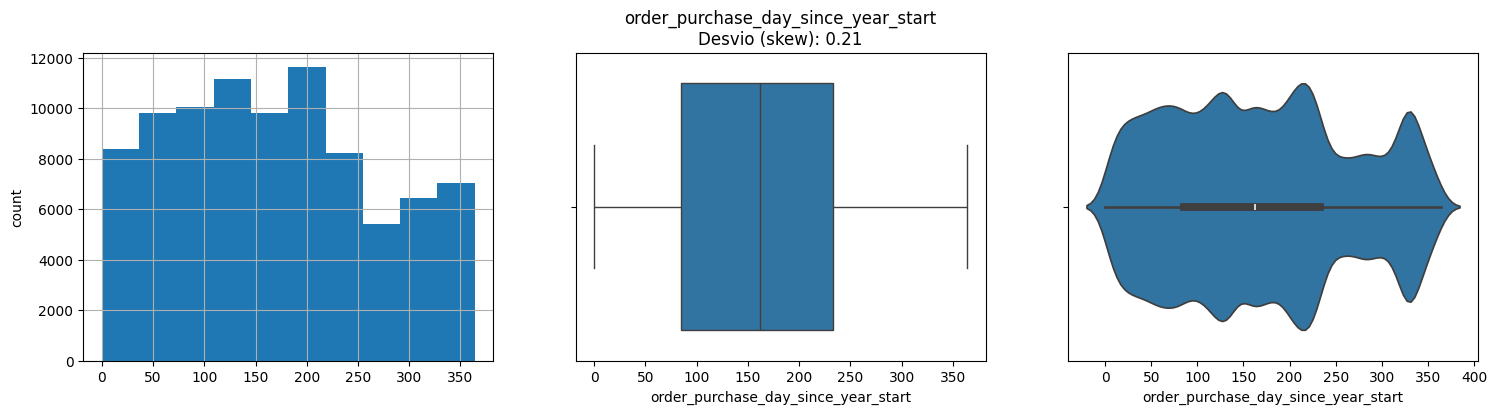

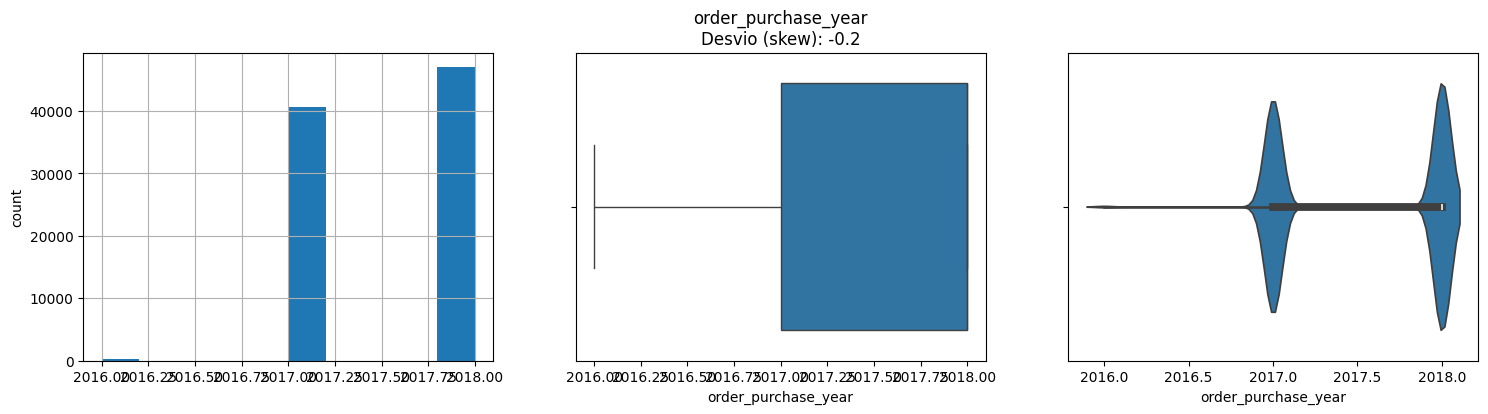

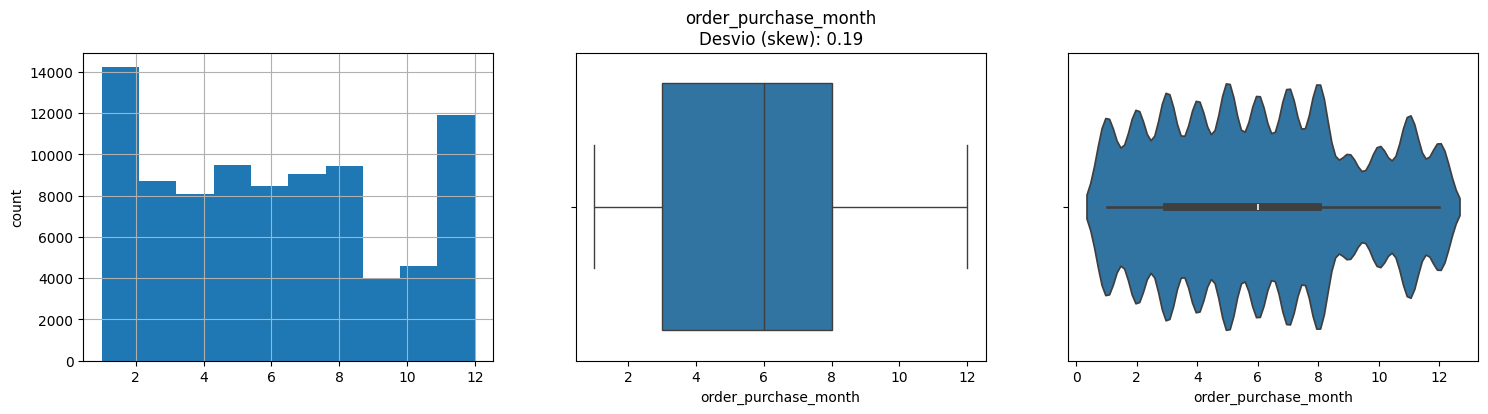

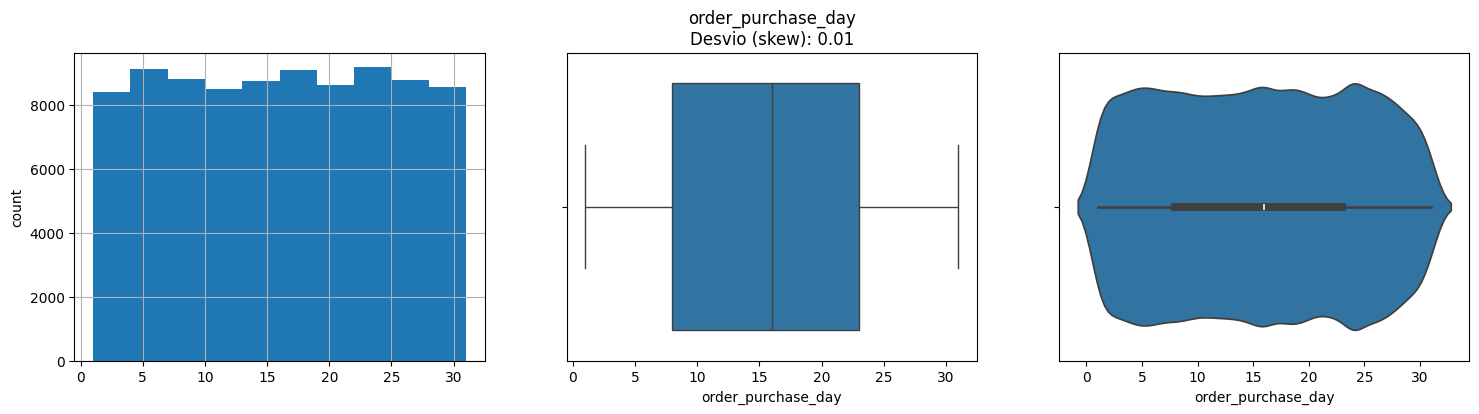

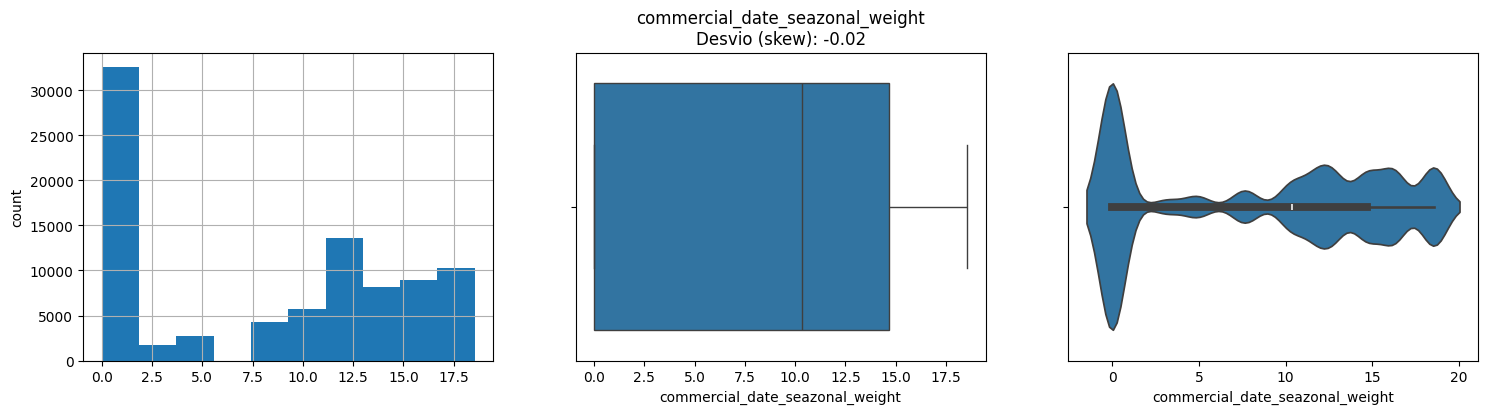

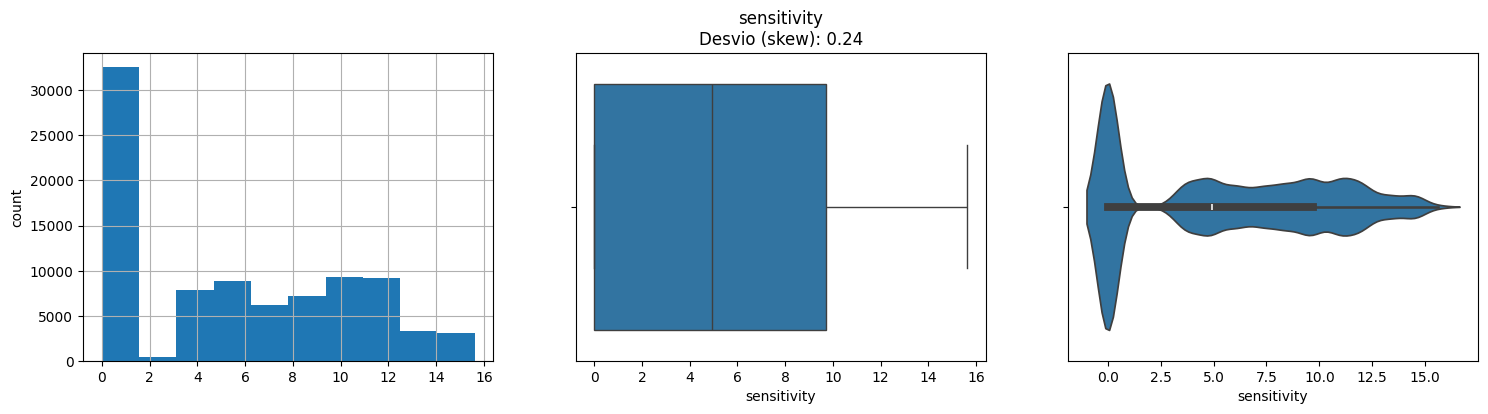

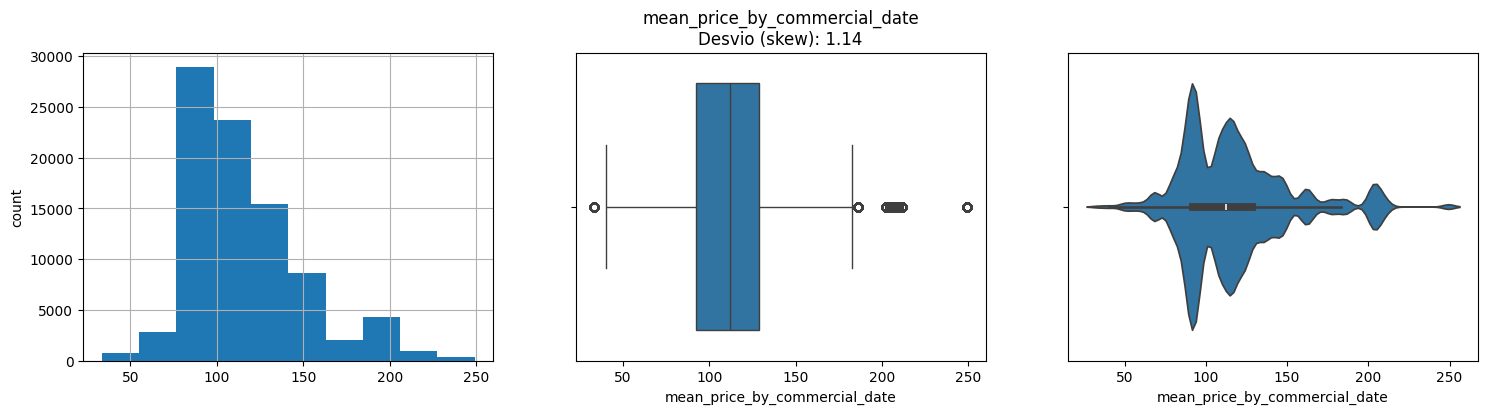

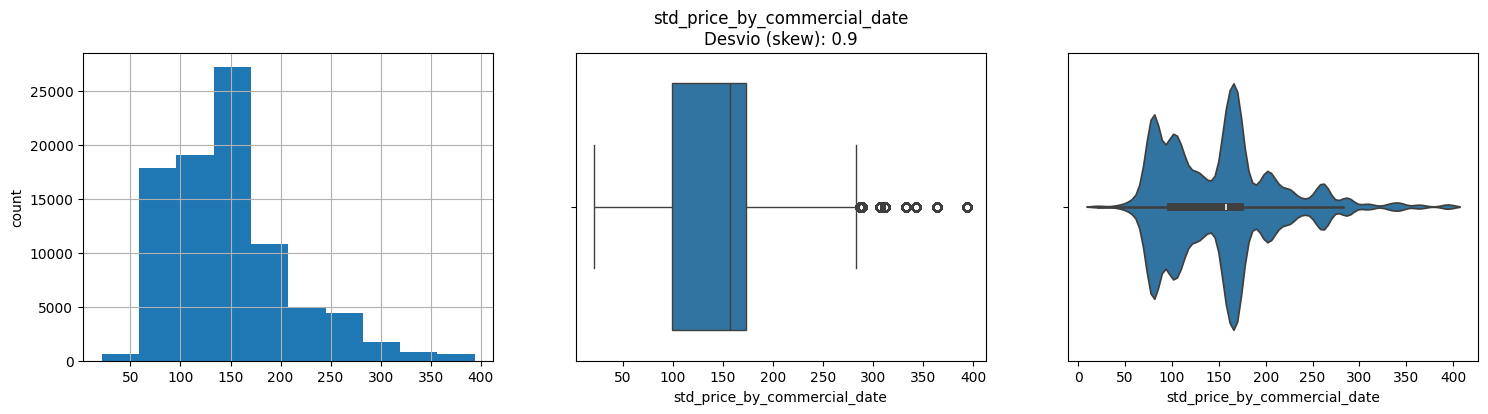

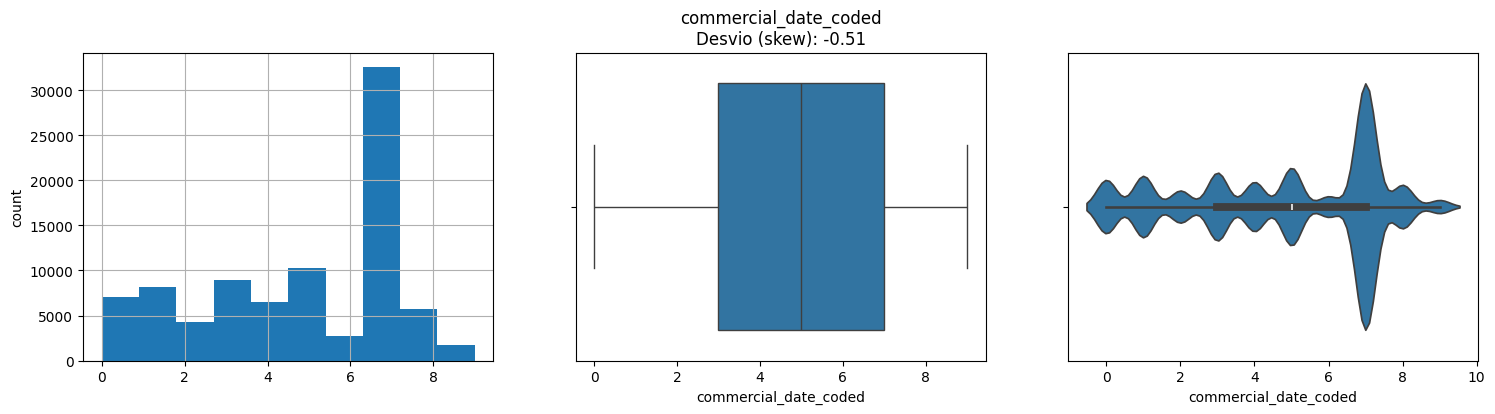

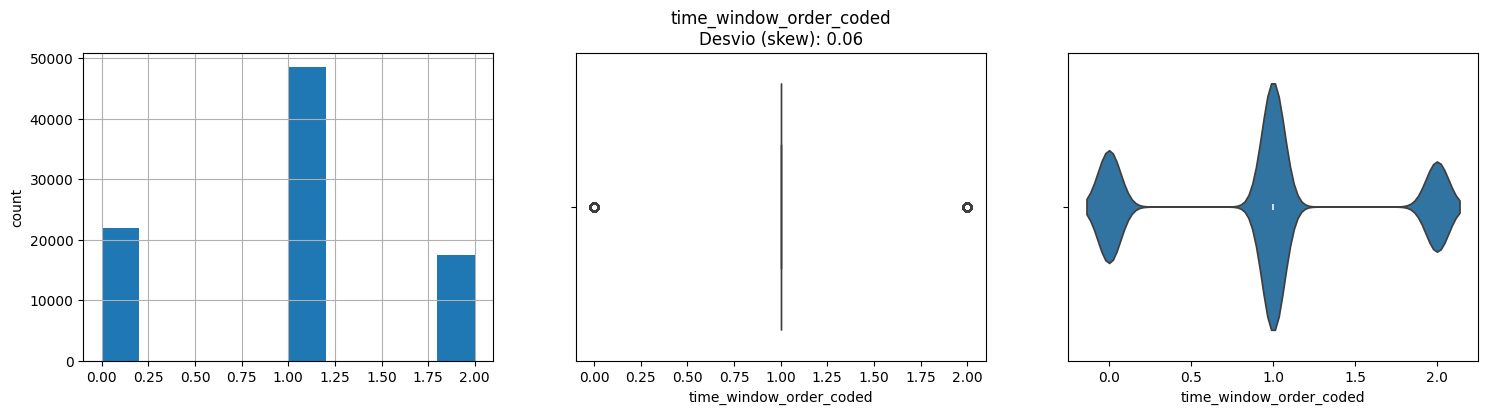

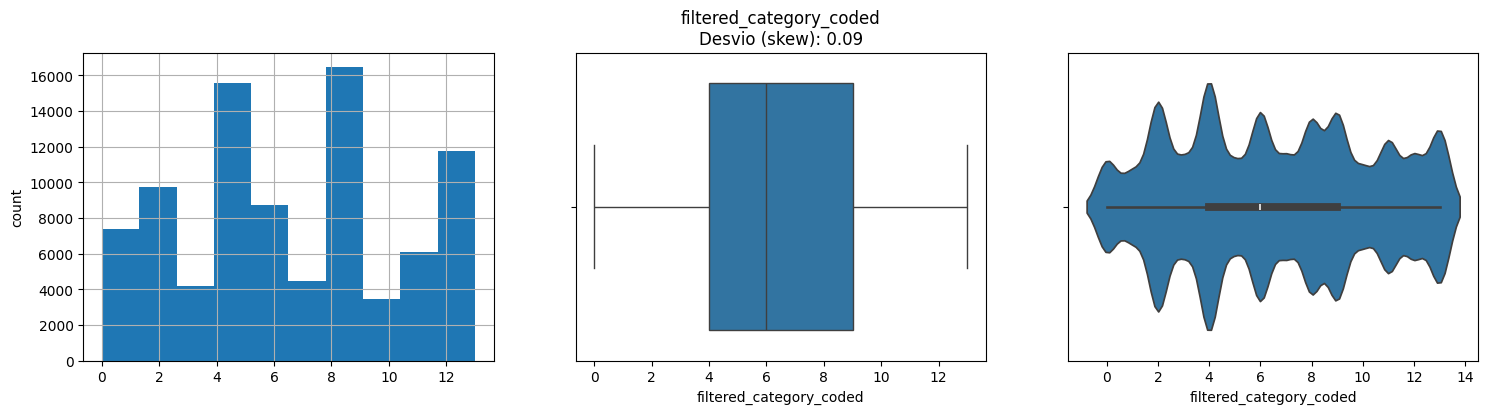

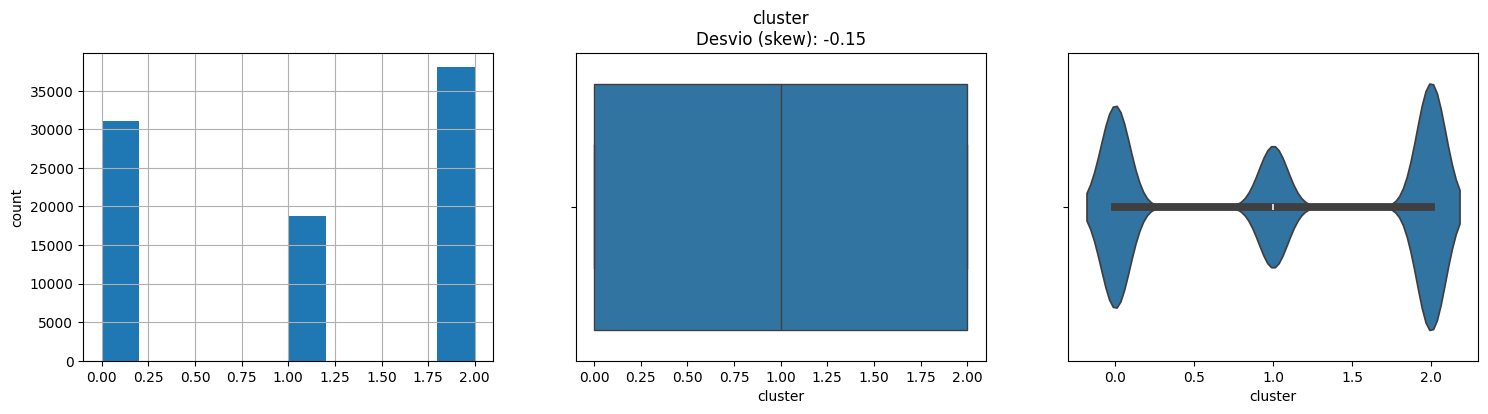

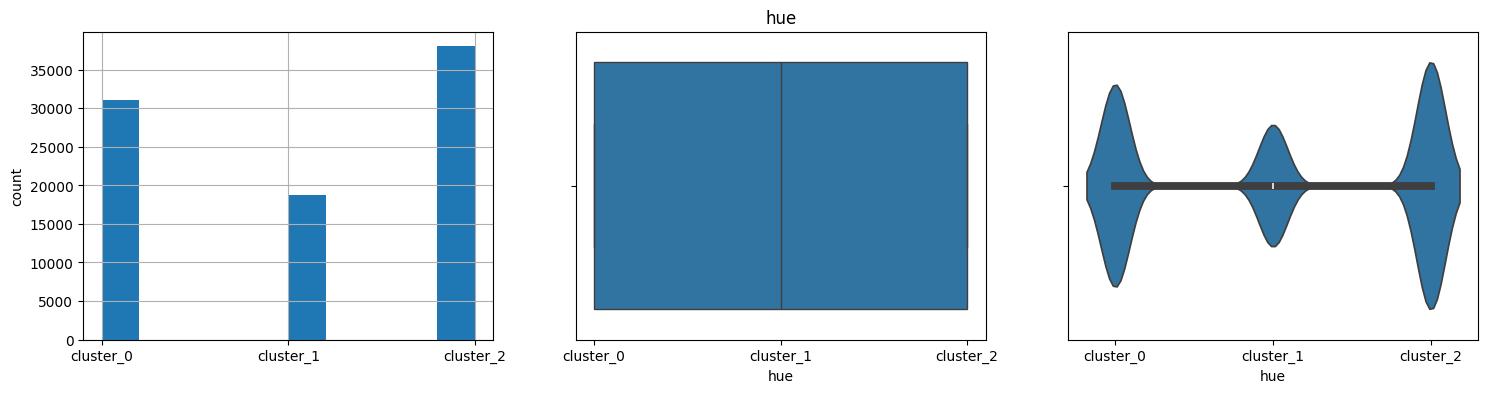

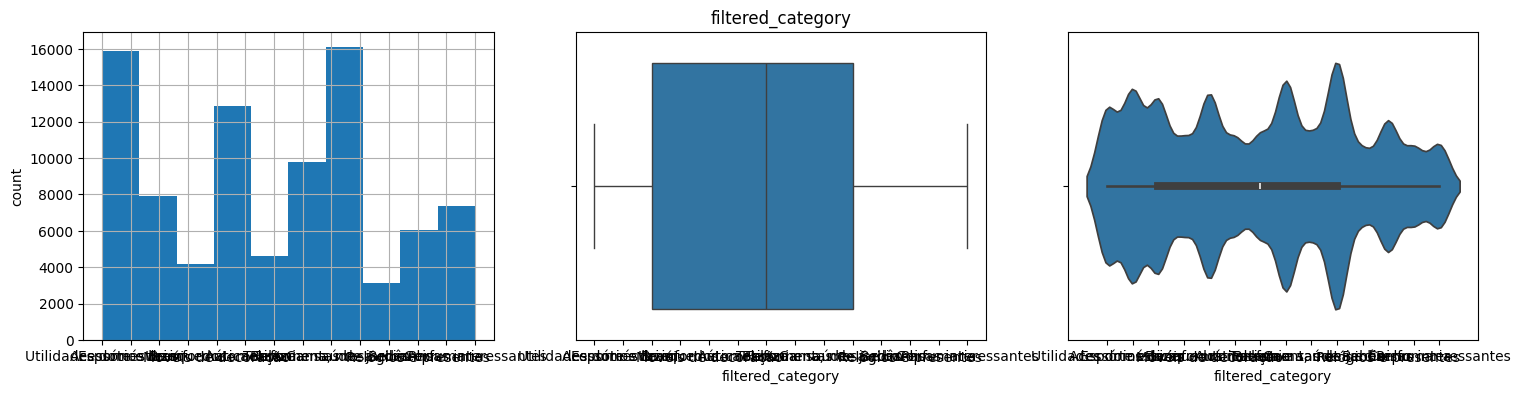

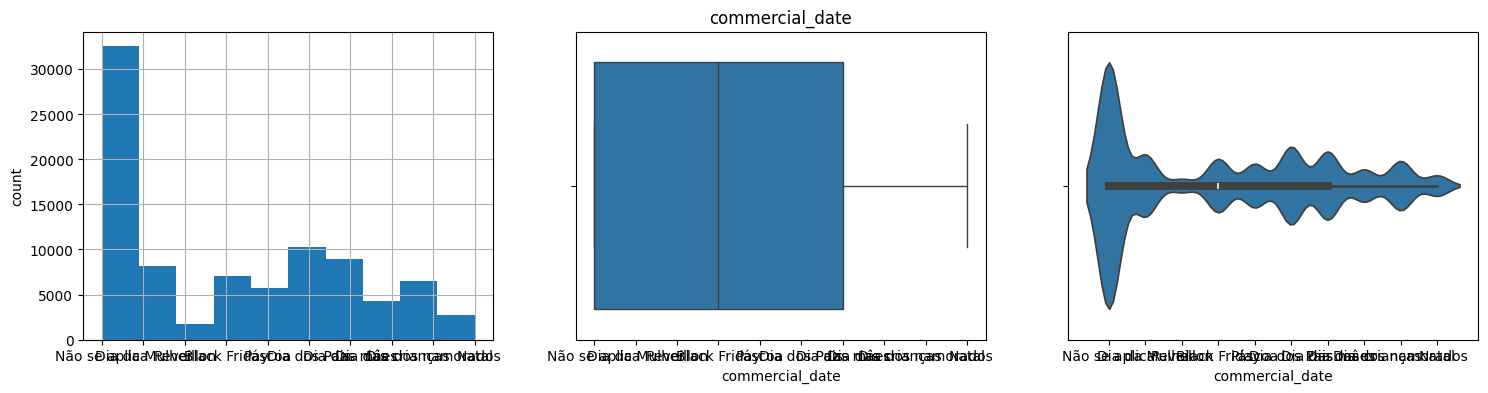

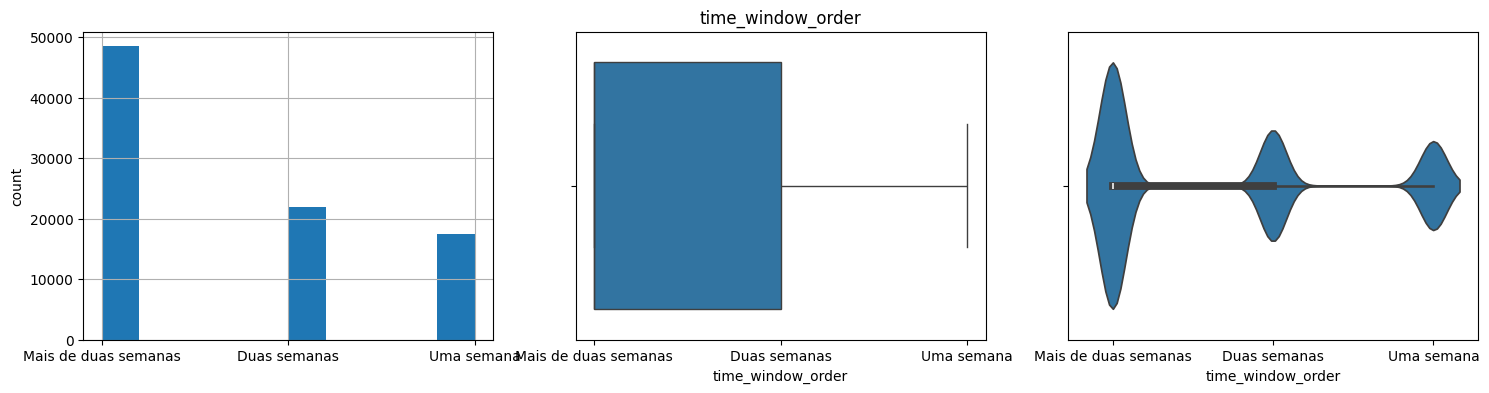

In [32]:
for col in df.columns:
    title = col
    if (col in colunas_numericas):
        title += f"\nDesvio (skew): {round(df[col].skew(), 2)}"
    
    plt.figure(figsize = (18, 4))
    plt.subplot(1, 3, 1)
    df[col].hist()
    plt.ylabel('count')
    plt.subplot(1, 3, 2)
    plt.title(title)
    sns.boxplot(x=df[col])
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[col])
    plt.show()

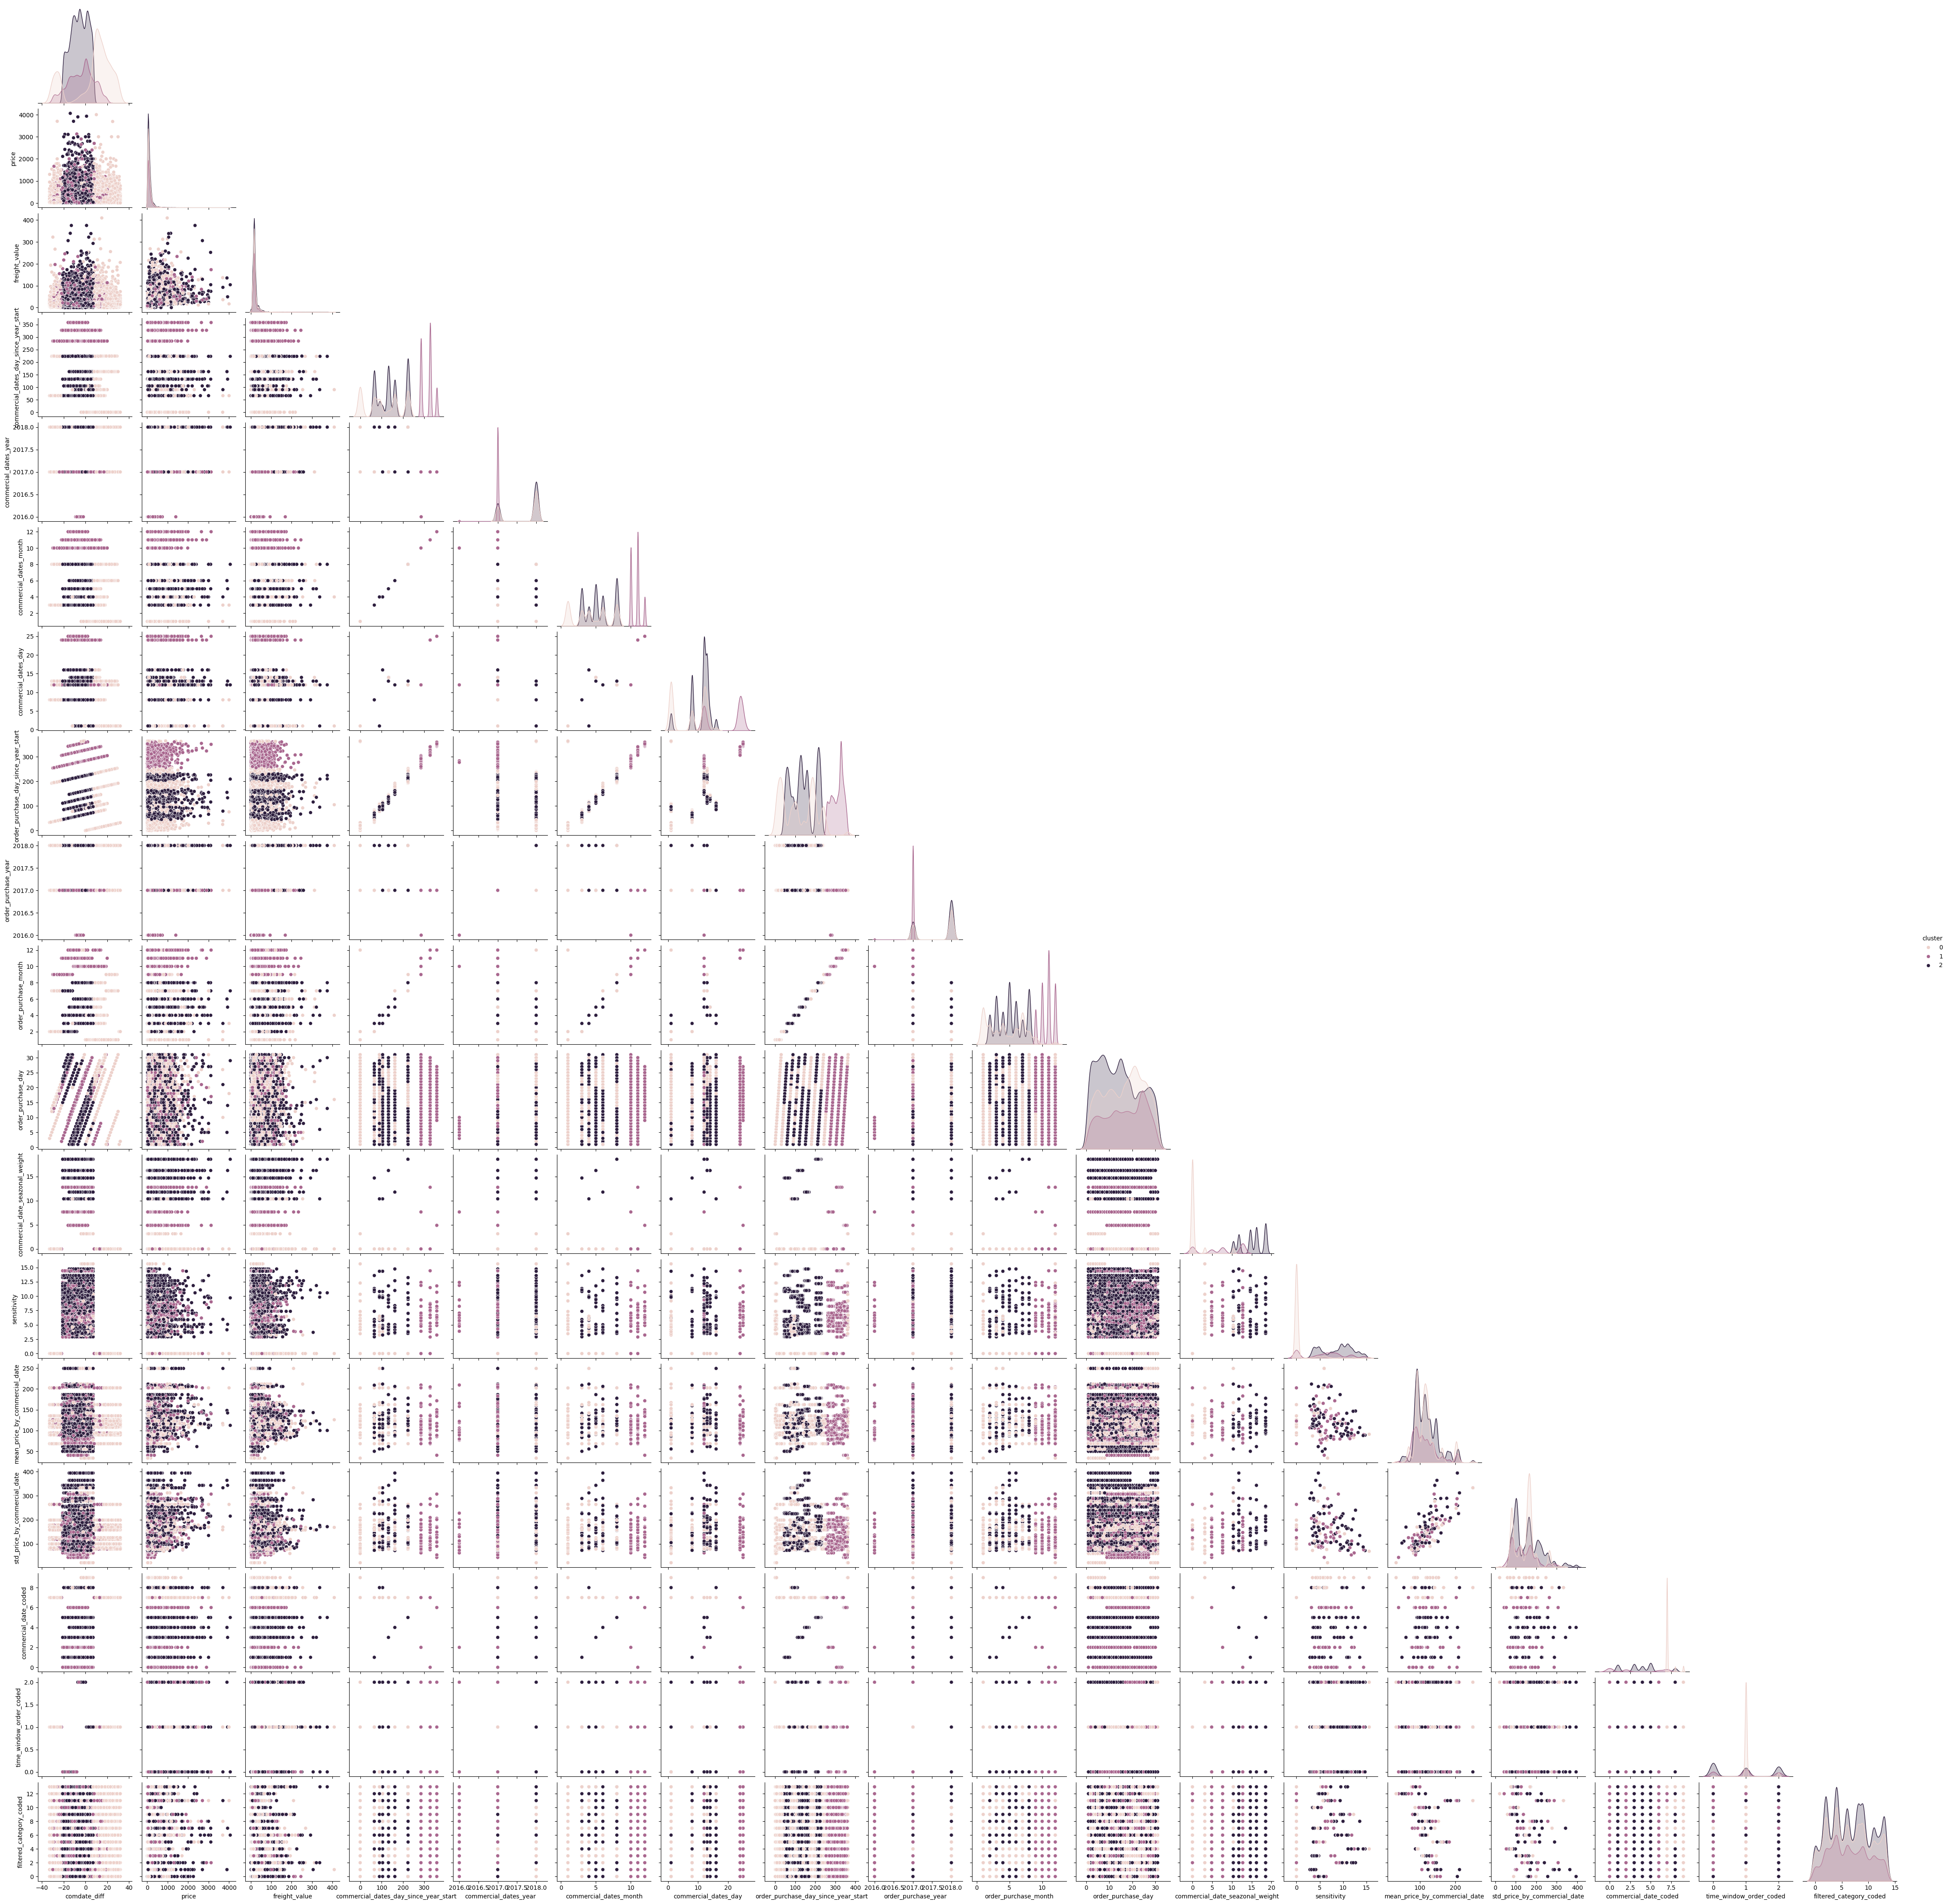

In [20]:
sns.pairplot(df.drop(columns=colunas_categoricas), corner=True, hue="cluster")

## EDA

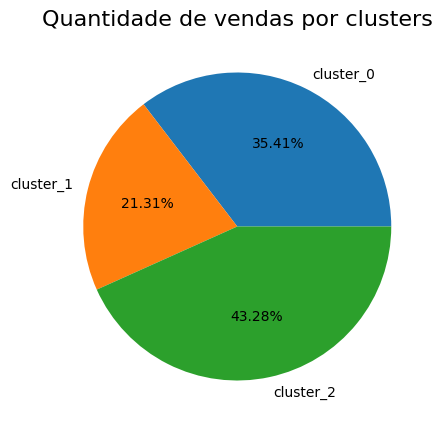

In [4]:
grouped_cluster= df.groupby(['hue'])['hue'].count()
grouped_cluster = grouped_cluster.reset_index(name='qtd')
grouped_cluster

plt.figure(figsize=(8, 5))
plt.title('Quantidade de vendas por clusters', fontsize=16)
plt.pie(grouped_cluster['qtd'], labels=grouped_cluster['hue'], autopct='%1.2f%%')
plt.show()

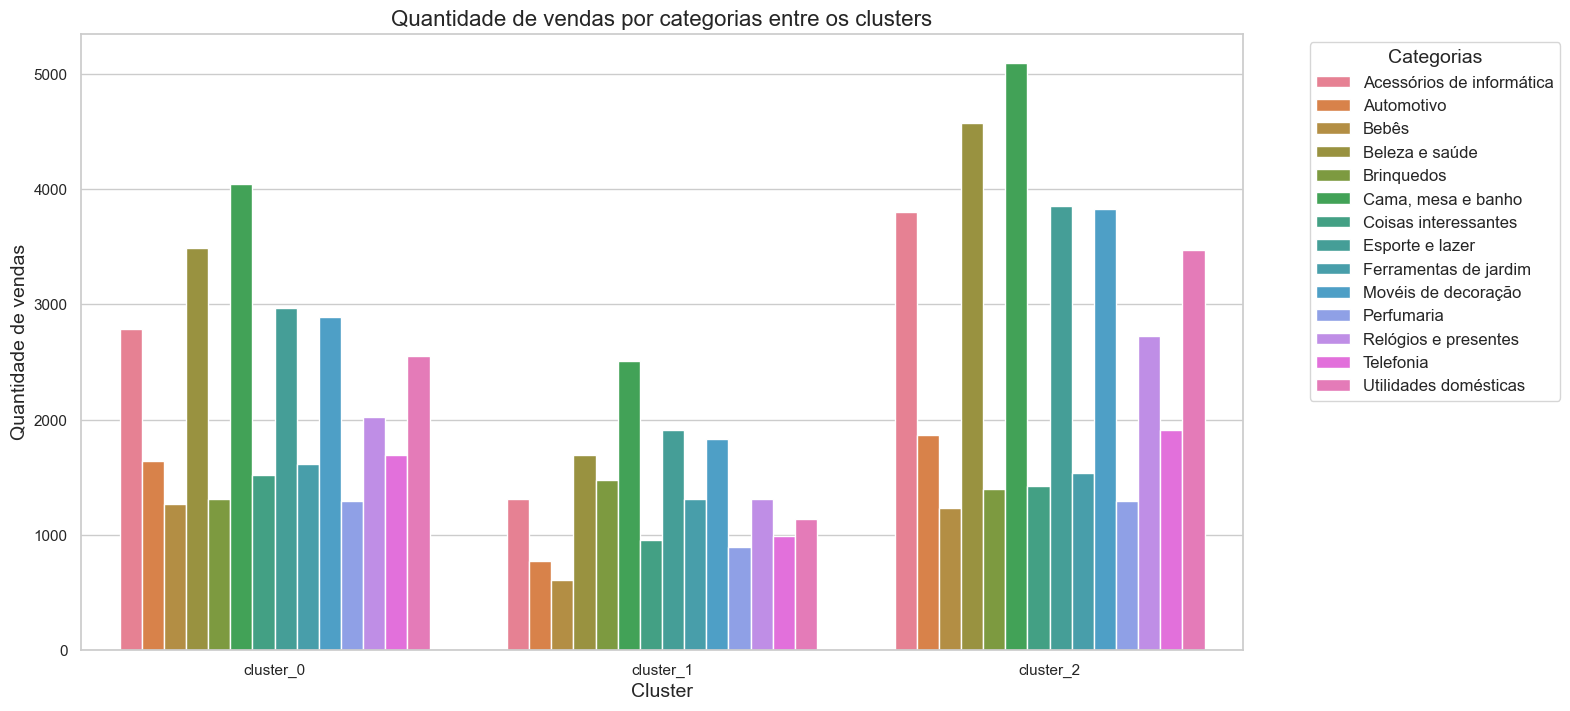

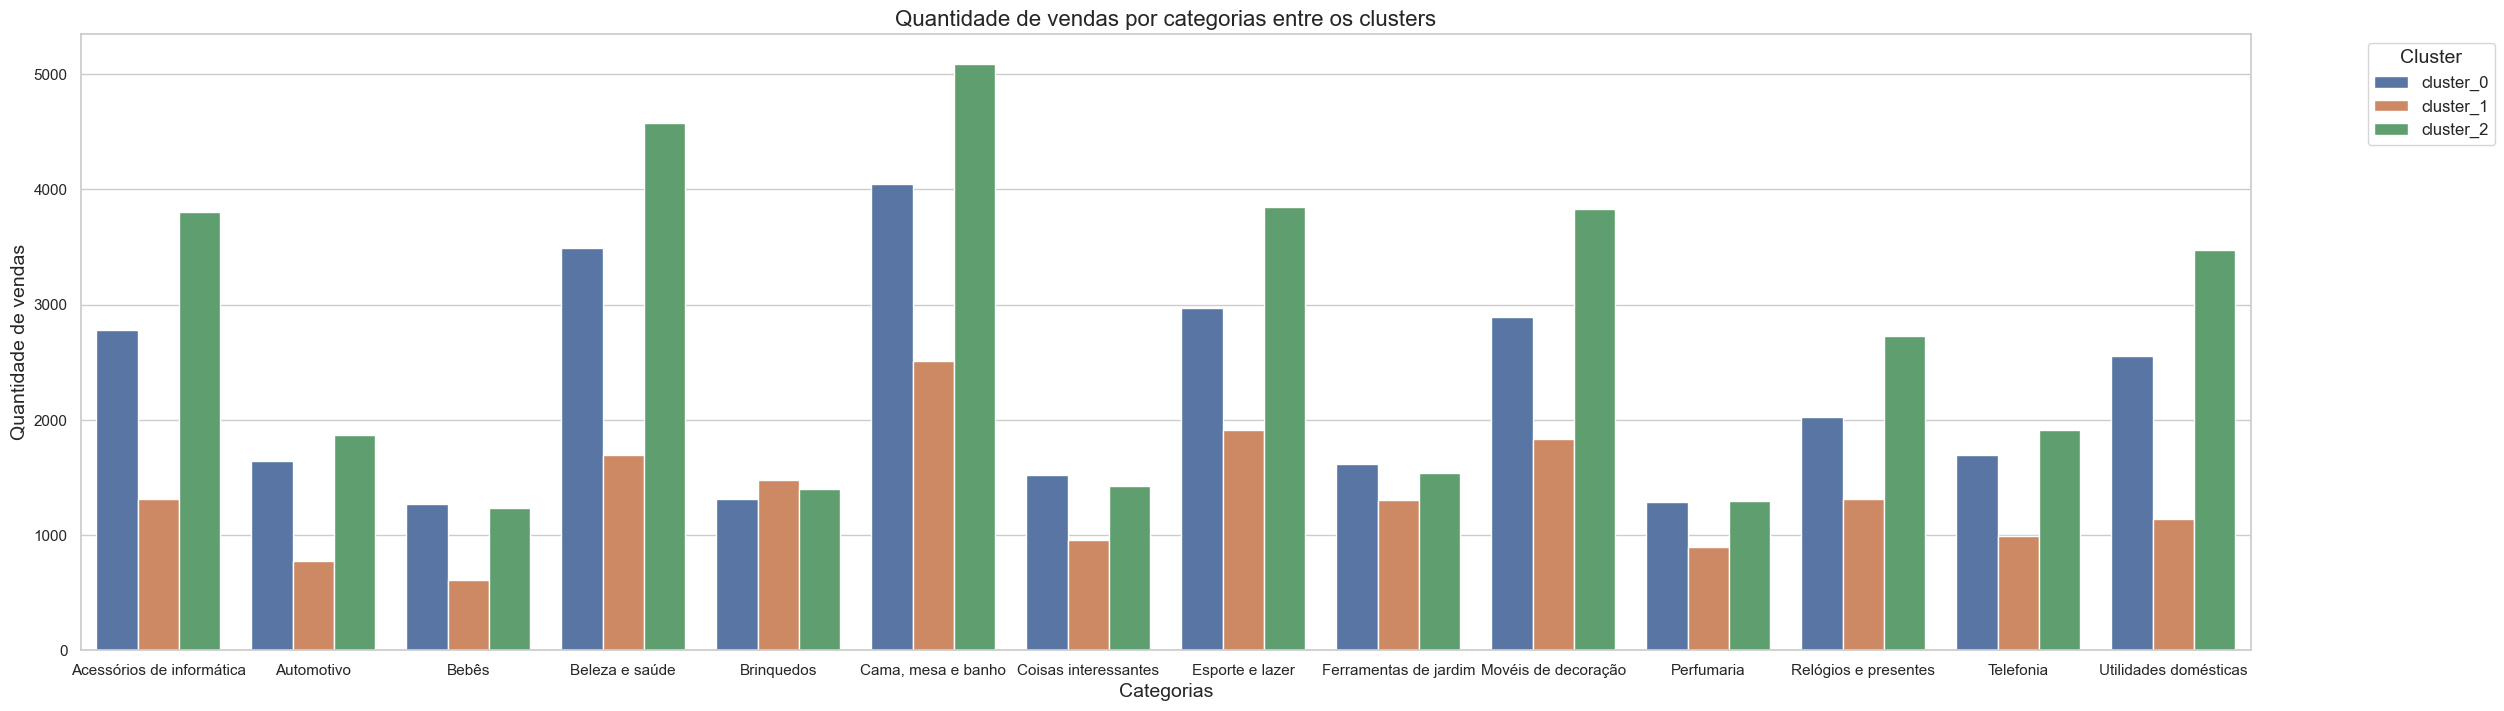

In [5]:
grouped_category_per_cluster= df.groupby(['hue', "filtered_category"])["filtered_category"].count().reset_index(name='qtd_percategory')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_category_per_cluster, x='hue', y='qtd_percategory', hue='filtered_category')
plt.title('Quantidade de vendas por categorias entre os clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Categorias', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figure(figsize=(28, 8))
sns.barplot(data=grouped_category_per_cluster, x='filtered_category', y='qtd_percategory', hue='hue')
plt.title('Quantidade de vendas por categorias entre os clusters', fontsize=16)
plt.xlabel('Categorias', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [6]:
# grouped_category_per_year_cluster= df.groupby(['hue', "order_purchase_year", "filtered_category"])["filtered_category"].count()
# grouped_category_per_year_cluster = grouped_category_per_year_cluster.reset_index(name='qtd_per_yearcategory')

# anos = sorted(list(grouped_category_per_year_cluster["order_purchase_year"].unique()))
# for y in anos:
#     df_temp = grouped_category_per_year_cluster[grouped_category_per_year_cluster['order_purchase_year'] == y]
#     sns.set(style="whitegrid")
#     plt.figure(figsize=(10, 5))
#     sns.barplot(data=df_temp, x='hue', y='qtd_per_yearcategory', hue='filtered_category')
#     plt.title('Quantidade de vendas por categorias entre os clusters no ano {y}', fontsize=16)
#     plt.xlabel('Cluster', fontsize=14)
#     plt.ylabel('Quantidade de vendas', fontsize=14)
#     plt.legend(title='Categorias', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.show()

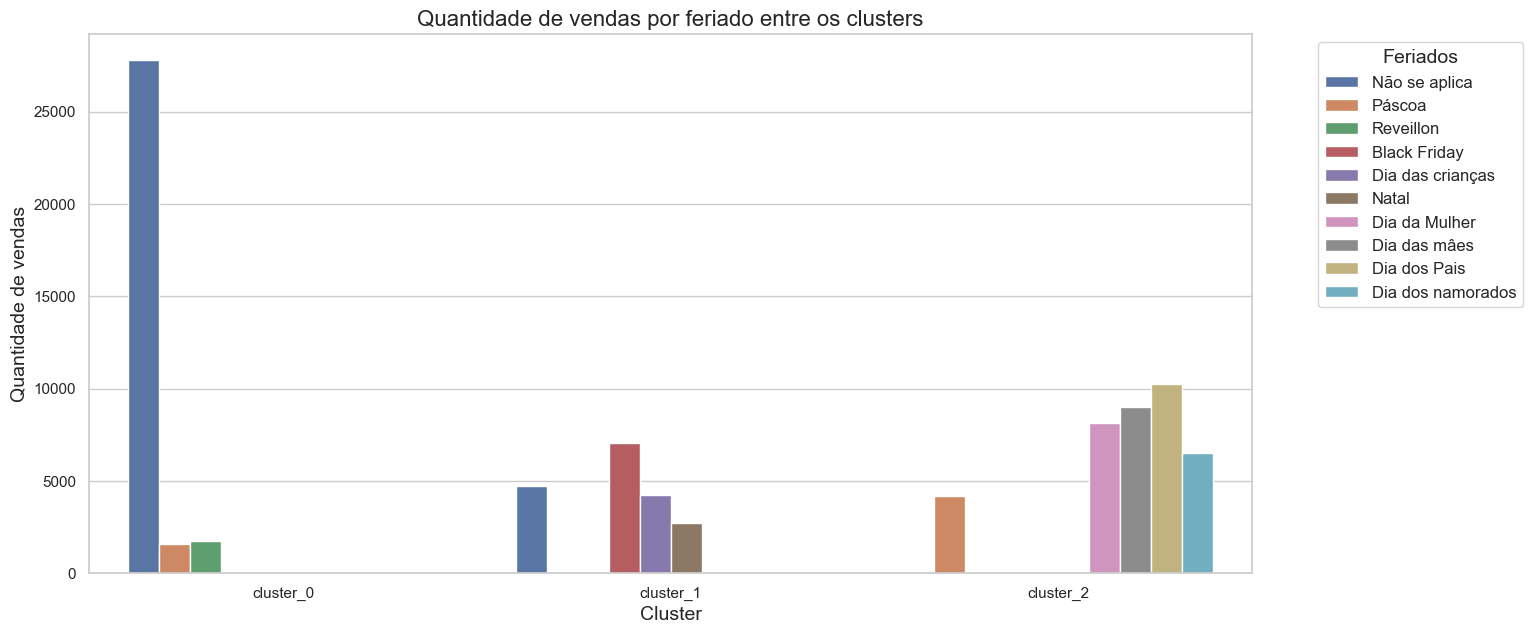

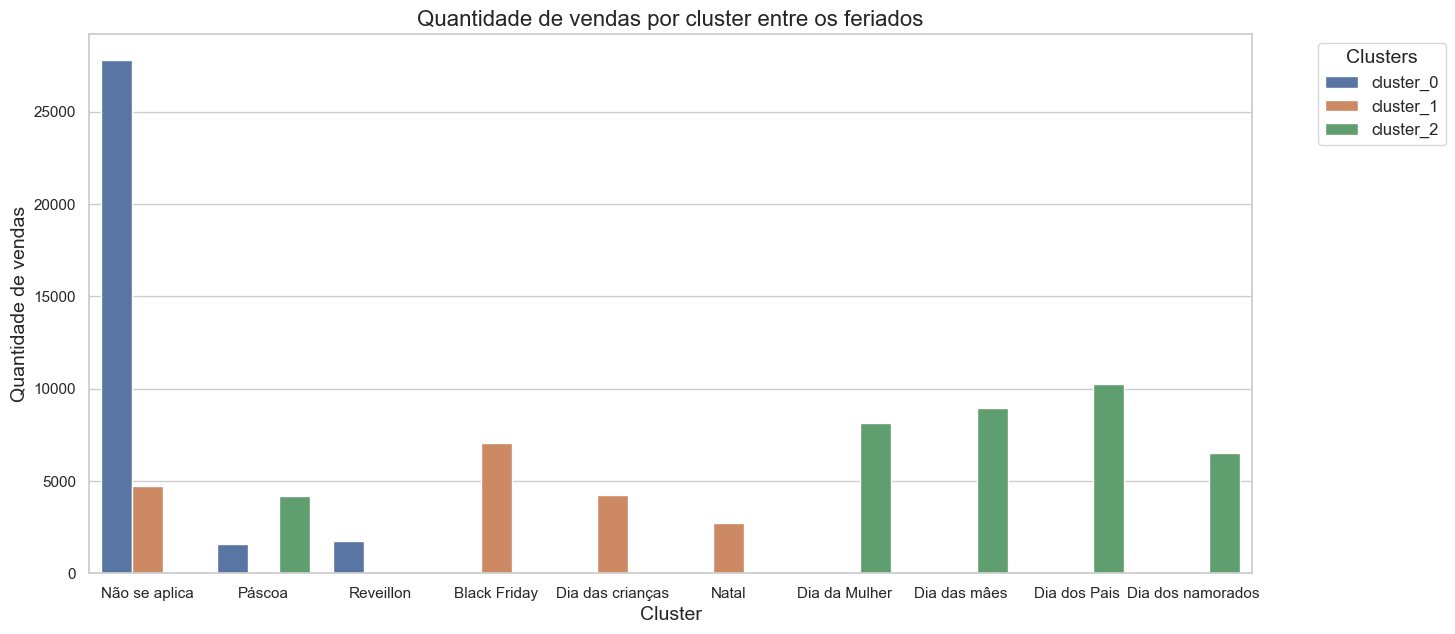

In [7]:
grouped_commercialdate_per_cluster= df.groupby(['hue', "commercial_date"])["commercial_date"].count()
grouped_commercialdate_per_cluster = grouped_commercialdate_per_cluster.reset_index(name='qtd_percommercialdate')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=grouped_commercialdate_per_cluster, x='hue', y='qtd_percommercialdate', hue='commercial_date')
plt.title('Quantidade de vendas por feriado entre os clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Feriados', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.barplot(data=grouped_commercialdate_per_cluster, x='commercial_date', y='qtd_percommercialdate', hue='hue')
plt.title('Quantidade de vendas por cluster entre os feriados', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de vendas', fontsize=14)
plt.legend(title='Clusters', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()